In [1]:
import numpy as np

import torch.nn as nn
from torch.autograd import Variable

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,log_loss,roc_auc_score
import keras
from keras.models import Sequential,Model
from keras.layers.core import Dense,Dropout
from keras.optimizers import Adagrad,RMSprop,SGD
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils

%matplotlib inline


#helper function
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

Using TensorFlow backend.


In [2]:
num_classes=10
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [5]:
input_img = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu',trainable=False)(input_img)
encoded = Dense(64, activation='relu',trainable=False)(encoded)
encoded = Dense(32, activation='relu',trainable=False)(encoded)
"""
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
"""

In [9]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=32,
                shuffle=True)

Epoch 1/5
60000/60000 [==============================] - 15s - loss: 0.2385    
Epoch 2/5
60000/60000 [==============================] - 16s - loss: 0.1671    
Epoch 3/5
60000/60000 [==============================] - 20s - loss: 0.1467    
Epoch 4/5
60000/60000 [==============================] - 20s - loss: 0.1342    
Epoch 5/5
60000/60000 [==============================] - 18s - loss: 0.1261    


In [10]:
output = Dense(10,activation='softmax')(encoded)
autoencoder = Model(input_img,output)
autoencoder.compile(optimizer='adadelta',loss='categorical_crossentropy',metrics=['accuracy'])
autoencoder.fit(x_train,y_train,epochs=5,batch_size=32)
score = autoencoder.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
60000/60000 [==============================] - 6s - loss: 0.6370 - acc: 0.8635     
Epoch 2/5
60000/60000 [==============================] - 6s - loss: 0.1702 - acc: 0.9496     
Epoch 3/5
60000/60000 [==============================] - 6s - loss: 0.1282 - acc: 0.9622     
Epoch 4/5
60000/60000 [==============================] - 6s - loss: 0.1041 - acc: 0.9689     
Epoch 5/5
60000/60000 [==============================] - 8s - loss: 0.0879 - acc: 0.9741     
Test loss: 0.096112158701
Test accuracy: 0.9701


In [14]:
m = x_test[0]

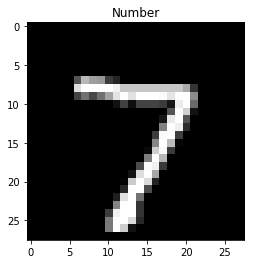

In [19]:
pixels = m.reshape((28, 28))

# Plot
plt.title('Number')
plt.imshow(pixels, cmap='gray')
plt.show()

In [50]:
m.flatten().shape

(784,)

In [53]:
s = autoencoder.predict(m.reshape(1,784))

In [58]:
s

array([[  1.07290674e-07,   6.14164932e-08,   1.05321458e-04,
          3.82217957e-04,   1.42870351e-11,   1.03269171e-08,
          1.39862622e-12,   9.99507666e-01,   1.54252326e-08,
          4.50520838e-06]], dtype=float32)

In [59]:
a = s.argmax(axis=-1)

In [60]:
a

array([7])

In [61]:
def plot_sample(s):
    pixels = s.reshape((28, 28))
    # Plot
    plt.title('Number')
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [64]:
e = x_test[5]

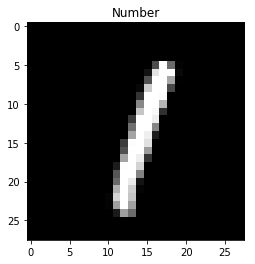

In [65]:
plot_sample(e)

In [66]:
pred = autoencoder.predict(e.reshape(1,784))

In [67]:
pred = pred.argmax(axis=-1)

In [68]:
pred

array([1])

In [76]:
autoencoder.save('autoencoder-mnist-classifier.h5')